In [1]:
import tensorflow as tf
import tensorflow_hub as hub
# For saving 'feature vectors' into a txt file
import numpy as np
# Glob for reading file names in a folder
import glob
import os.path
from tqdm import tqdm
import ntpath
import warnings
import cv2
from annoy import AnnoyIndex
from scipy import spatial
warnings.filterwarnings('ignore')
from operator import itemgetter
import time

In [2]:
def load_img(path):
    # Reads the image file and returns data type of string
    img = tf.io.read_file(path)
    # Decodes the image to W x H x 3 shape tensor with type of uint8
    img = tf.io.decode_jpeg(img, channels=3)
    # Resizes the image to 224 x 224 x 3 shape tensor
    img = tf.image.resize_with_pad(img, 224, 224)
    # Converts the data type of uint8 to float32 by adding a new axis
    # img becomes 1 x 224 x 224 x 3 tensor with data type of float32
    # This is required for the mobilenet model we are using
    img = tf.image.convert_image_dtype(img,tf.float32)[tf.newaxis, ...]

    return img

In [3]:
def match_id(filename):
    product_id = '_'.join(filename.split('_')[:-1])
    #product_id = filename
    print(product_id, "****")
    return product_id

In [7]:
image_paths= glob.glob('C:\\Users\\aksha\\Desktop\\ADM\\Assignment-3\\SUBMISSION\\Method-3-Spotify_Annoy\\DataImage\\*.jpg')

In [5]:
def get_image_feature_vectors(path):
    module_handle = "https://tfhub.dev/google/imagenet/mobilenet_v2_140_224/feature_vector/4"
    # Loads the module
    module = hub.load(module_handle)
    # Loops through all images in a local folder

    #print(path)
    # Loads and pre-process the image
    img = load_img(path)
    # Calculate the image feature vector of the img
    features = module(img)
    # Remove single-dimensional entries from the 'features' array  
    feature_set = np.squeeze(features)

    # Saves the image feature vectors into a file for later use
    outfile_name = os.path.basename(filename) + ".npz"

    out_path = os.path.join('C:\\Users\\aksha\\Desktop\\ADM\\Assignment-3\\SUBMISSION\\Method-3-Spotify_Annoy\\DataImage\\',outfile_name)
    # Saves the 'feature_set' to a text file
    np.savetxt(out_path, feature_set, delimiter=',')

In [8]:
def get_features(img, image_path): 
     # Definition of module with using tfhub.dev
    module_handle = "https://tfhub.dev/google/imagenet/mobilenet_v2_140_224/feature_vector/4"
    # Loads the module
    module = hub.load(module_handle)
    features = module(img)
    # Remove single-dimensional entries from the 'features' array  
    feature_set = np.squeeze(features)
    #print(image_path)

    # Saves the image feature vectors into a file for later use
    outfile_name = os.path.basename(image_path) + ".npz"

    out_path = os.path.join('C:\\Users\\aksha\\Desktop\\ADM\\Assignment-3\\SUBMISSION\\Method-3-Spotify_Annoy\\DataImage\\ImagesScraped\\',outfile_name)
    # Saves the 'feature_set' to a text file
    np.savetxt(out_path, feature_set, delimiter=',')
    vector = np.loadtxt(out_path)
    return vector
    

In [9]:
image_paths= glob.glob('C:\\Users\\aksha\\Desktop\\ADM\\Assignment-3\\SUBMISSION\\Method-3-Spotify_Annoy\\DataImage\\*.jpg')
vectorfiles = glob.glob('C:\\Users\\aksha\\Desktop\\ADM\\Assignment-3\\SUBMISSION\\Method-3-Spotify_Annoy\\DataImage\\ImagesScraped\\*.npz')
# compute styles
image_style_embeddings = {}

for image_path in tqdm(image_paths): 
    image_tensor = load_img(image_path)
    vector = get_features(image_tensor, image_path)
    image_style_embeddings[ntpath.basename(image_path)] = vector
    

  1%|▊                                                                                 | 4/400 [00:20<34:33,  5.24s/it]

  1%|█                                                                                 | 5/400 [00:25<33:49,  5.14s/it]

  2%|█▏                                                                                | 6/400 [00:30<33:15,  5.06s/it]

  2%|█▍                                                                                | 7/400 [00:35<32:35,  4.98s/it]

  2%|█▋                                                                                | 8/400 [00:40<32:31,  4.98s/it]

  2%|█▊                                                                                | 9/400 [00:44<32:02,  4.92s/it]

  2%|██                                                                               | 10/400 [00:49<31:46,  4.89s/it]

  3%|██▏                                                                              | 11/400 [00:54<31:21,  4.84s/it]

  3%|██▍                                                                              | 12/400 [00:59<31:22,  4.85s/it]

  3%|██▋                                                                              | 13/400 [01:04<31:23,  4.87s/it]

  4%|██▊                                                                              | 14/400 [01:09<31:23,  4.88s/it]

  4%|███                                                                              | 15/400 [01:13<31:14,  4.87s/it]

  4%|███▏                                                                             | 16/400 [01:18<30:48,  4.81s/it]

  4%|███▍                                                                             | 17/400 [01:23<30:38,  4.80s/it]

  4%|███▋                                                                             | 18/400 [01:28<30:32,  4.80s/it]

  5%|███▊                                                                             | 19/400 [01:32<30:30,  4.81s/it]

  5%|████                                                                             | 20/400 [01:37<30:34,  4.83s/it]

  5%|████▎                                                                            | 21/400 [01:42<30:42,  4.86s/it]

  6%|████▍                                                                            | 22/400 [01:47<30:17,  4.81s/it]

  6%|████▋                                                                            | 23/400 [01:52<30:12,  4.81s/it]

  6%|████▊                                                                            | 24/400 [01:56<29:56,  4.78s/it]

  6%|█████                                                                            | 25/400 [02:01<29:39,  4.74s/it]

  6%|█████▎                                                                           | 26/400 [02:06<29:43,  4.77s/it]

  7%|█████▍                                                                           | 27/400 [02:11<29:53,  4.81s/it]

  7%|█████▋                                                                           | 28/400 [02:16<29:30,  4.76s/it]

  7%|█████▊                                                                           | 29/400 [02:20<29:31,  4.77s/it]

  8%|██████                                                                           | 30/400 [02:25<29:27,  4.78s/it]

  8%|██████▎                                                                          | 31/400 [02:30<29:17,  4.76s/it]

  8%|██████▍                                                                          | 32/400 [02:35<29:15,  4.77s/it]

  8%|██████▋                                                                          | 33/400 [02:39<29:05,  4.76s/it]

  8%|██████▉                                                                          | 34/400 [02:44<29:06,  4.77s/it]

  9%|███████                                                                          | 35/400 [02:49<28:53,  4.75s/it]

  9%|███████▎                                                                         | 36/400 [02:54<28:50,  4.75s/it]

  9%|███████▍                                                                         | 37/400 [02:58<28:44,  4.75s/it]

 10%|███████▋                                                                         | 38/400 [03:03<28:42,  4.76s/it]

 10%|███████▉                                                                         | 39/400 [03:08<28:42,  4.77s/it]

 10%|████████                                                                         | 40/400 [03:13<28:34,  4.76s/it]

 10%|████████▎                                                                        | 41/400 [03:18<28:37,  4.78s/it]

 10%|████████▌                                                                        | 42/400 [03:22<28:19,  4.75s/it]

 11%|████████▋                                                                        | 43/400 [03:27<28:27,  4.78s/it]

 11%|████████▉                                                                        | 44/400 [03:32<28:17,  4.77s/it]

 11%|█████████                                                                        | 45/400 [03:37<28:24,  4.80s/it]

 12%|█████████▎                                                                       | 46/400 [03:41<28:07,  4.77s/it]

 12%|█████████▌                                                                       | 47/400 [03:46<28:04,  4.77s/it]

 12%|█████████▋                                                                       | 48/400 [03:51<27:49,  4.74s/it]

 12%|█████████▉                                                                       | 49/400 [03:56<27:47,  4.75s/it]

 12%|██████████▏                                                                      | 50/400 [04:00<27:36,  4.73s/it]

 13%|██████████▎                                                                      | 51/400 [04:05<27:44,  4.77s/it]

 13%|██████████▌                                                                      | 52/400 [04:10<27:42,  4.78s/it]

 13%|██████████▋                                                                      | 53/400 [04:15<27:40,  4.78s/it]

 14%|██████████▉                                                                      | 54/400 [04:19<27:15,  4.73s/it]

 14%|███████████▏                                                                     | 55/400 [04:24<27:14,  4.74s/it]

 14%|███████████▎                                                                     | 56/400 [04:29<27:08,  4.73s/it]

 14%|███████████▌                                                                     | 57/400 [04:34<27:14,  4.77s/it]

 14%|███████████▋                                                                     | 58/400 [04:39<27:30,  4.83s/it]

 15%|███████████▉                                                                     | 59/400 [04:43<27:14,  4.79s/it]

 15%|████████████▏                                                                    | 60/400 [04:48<27:06,  4.78s/it]

 15%|████████████▎                                                                    | 61/400 [04:53<27:17,  4.83s/it]

 16%|████████████▌                                                                    | 62/400 [04:58<27:06,  4.81s/it]

 16%|████████████▊                                                                    | 63/400 [05:03<26:52,  4.78s/it]

 16%|████████████▉                                                                    | 64/400 [05:07<26:45,  4.78s/it]

 16%|█████████████▏                                                                   | 65/400 [05:12<26:38,  4.77s/it]

 16%|█████████████▎                                                                   | 66/400 [05:17<26:36,  4.78s/it]

 17%|█████████████▌                                                                   | 67/400 [05:22<26:26,  4.76s/it]

 17%|█████████████▊                                                                   | 68/400 [05:26<26:16,  4.75s/it]

 17%|█████████████▉                                                                   | 69/400 [05:31<26:13,  4.75s/it]

 18%|██████████████▏                                                                  | 70/400 [05:36<26:29,  4.82s/it]

 18%|██████████████▍                                                                  | 71/400 [05:41<26:17,  4.80s/it]

 18%|██████████████▌                                                                  | 72/400 [05:46<26:15,  4.80s/it]

 18%|██████████████▊                                                                  | 73/400 [05:50<26:14,  4.82s/it]

 18%|██████████████▉                                                                  | 74/400 [05:55<26:10,  4.82s/it]

 19%|███████████████▏                                                                 | 75/400 [06:00<26:12,  4.84s/it]

 19%|███████████████▍                                                                 | 76/400 [06:05<26:07,  4.84s/it]

 19%|███████████████▌                                                                 | 77/400 [06:10<25:59,  4.83s/it]

 20%|███████████████▊                                                                 | 78/400 [06:15<25:46,  4.80s/it]

 20%|███████████████▉                                                                 | 79/400 [06:19<25:41,  4.80s/it]

 20%|████████████████▏                                                                | 80/400 [06:24<25:38,  4.81s/it]

 20%|████████████████▍                                                                | 81/400 [06:29<25:36,  4.82s/it]

 20%|████████████████▌                                                                | 82/400 [06:34<25:29,  4.81s/it]

 21%|████████████████▊                                                                | 83/400 [06:39<25:30,  4.83s/it]

 21%|█████████████████                                                                | 84/400 [06:43<25:24,  4.83s/it]

 21%|█████████████████▏                                                               | 85/400 [06:48<25:09,  4.79s/it]

 22%|█████████████████▍                                                               | 86/400 [06:53<24:52,  4.75s/it]

 22%|█████████████████▌                                                               | 87/400 [06:58<24:42,  4.74s/it]

 22%|█████████████████▊                                                               | 88/400 [07:02<24:32,  4.72s/it]

 22%|██████████████████                                                               | 89/400 [07:07<24:24,  4.71s/it]

 22%|██████████████████▏                                                              | 90/400 [07:12<24:18,  4.70s/it]

 23%|██████████████████▍                                                              | 91/400 [07:16<24:16,  4.71s/it]

 23%|██████████████████▋                                                              | 92/400 [07:21<24:20,  4.74s/it]

 23%|██████████████████▊                                                              | 93/400 [07:26<24:32,  4.79s/it]

 24%|███████████████████                                                              | 94/400 [07:31<24:33,  4.81s/it]

 24%|███████████████████▏                                                             | 95/400 [07:36<24:32,  4.83s/it]

 24%|███████████████████▍                                                             | 96/400 [07:41<24:20,  4.80s/it]

 24%|███████████████████▋                                                             | 97/400 [07:45<24:11,  4.79s/it]

 24%|███████████████████▊                                                             | 98/400 [07:50<24:06,  4.79s/it]

 25%|████████████████████                                                             | 99/400 [07:55<23:56,  4.77s/it]

 25%|████████████████████                                                            | 100/400 [08:00<23:50,  4.77s/it]

 25%|████████████████████▏                                                           | 101/400 [08:04<23:50,  4.78s/it]

 26%|████████████████████▍                                                           | 102/400 [08:09<23:48,  4.79s/it]

 26%|████████████████████▌                                                           | 103/400 [08:14<23:36,  4.77s/it]

 26%|████████████████████▊                                                           | 104/400 [08:19<23:27,  4.76s/it]

 26%|█████████████████████                                                           | 105/400 [08:23<23:27,  4.77s/it]

 26%|█████████████████████▏                                                          | 106/400 [08:28<23:28,  4.79s/it]

 27%|█████████████████████▍                                                          | 107/400 [08:33<23:13,  4.76s/it]

 27%|█████████████████████▌                                                          | 108/400 [08:38<23:07,  4.75s/it]

 27%|█████████████████████▊                                                          | 109/400 [08:42<23:06,  4.76s/it]

 28%|██████████████████████                                                          | 110/400 [08:47<23:09,  4.79s/it]

 28%|██████████████████████▏                                                         | 111/400 [08:52<22:58,  4.77s/it]

 28%|██████████████████████▍                                                         | 112/400 [08:57<22:48,  4.75s/it]

 28%|██████████████████████▌                                                         | 113/400 [09:02<22:46,  4.76s/it]

 28%|██████████████████████▊                                                         | 114/400 [09:06<22:38,  4.75s/it]

 29%|███████████████████████                                                         | 115/400 [09:11<22:34,  4.75s/it]

 29%|███████████████████████▏                                                        | 116/400 [09:16<22:28,  4.75s/it]

 29%|███████████████████████▍                                                        | 117/400 [09:20<22:18,  4.73s/it]

 30%|███████████████████████▌                                                        | 118/400 [09:25<22:15,  4.73s/it]

 30%|███████████████████████▊                                                        | 119/400 [09:30<22:22,  4.78s/it]

 30%|████████████████████████                                                        | 120/400 [09:35<22:13,  4.76s/it]

 30%|████████████████████████▏                                                       | 121/400 [09:40<22:02,  4.74s/it]

 30%|████████████████████████▍                                                       | 122/400 [09:44<21:52,  4.72s/it]

 31%|████████████████████████▌                                                       | 123/400 [09:49<21:52,  4.74s/it]

 31%|████████████████████████▊                                                       | 124/400 [09:54<21:47,  4.74s/it]

 31%|█████████████████████████                                                       | 125/400 [09:58<21:43,  4.74s/it]

 32%|█████████████████████████▏                                                      | 126/400 [10:03<21:39,  4.74s/it]

 32%|█████████████████████████▍                                                      | 127/400 [10:08<21:36,  4.75s/it]

 32%|█████████████████████████▌                                                      | 128/400 [10:13<21:29,  4.74s/it]

 32%|█████████████████████████▊                                                      | 129/400 [10:17<21:21,  4.73s/it]

 32%|██████████████████████████                                                      | 130/400 [10:22<21:18,  4.74s/it]

 33%|██████████████████████████▏                                                     | 131/400 [10:27<21:11,  4.73s/it]

 33%|██████████████████████████▍                                                     | 132/400 [10:32<21:09,  4.74s/it]

 33%|██████████████████████████▌                                                     | 133/400 [10:36<21:00,  4.72s/it]

 34%|██████████████████████████▊                                                     | 134/400 [10:41<20:58,  4.73s/it]

 34%|███████████████████████████                                                     | 135/400 [10:46<20:50,  4.72s/it]

 34%|███████████████████████████▏                                                    | 136/400 [10:50<20:43,  4.71s/it]

 34%|███████████████████████████▍                                                    | 137/400 [10:55<20:42,  4.73s/it]

 34%|███████████████████████████▌                                                    | 138/400 [11:00<20:41,  4.74s/it]

 35%|███████████████████████████▊                                                    | 139/400 [11:05<20:48,  4.78s/it]

 35%|████████████████████████████                                                    | 140/400 [11:10<20:46,  4.80s/it]

 35%|████████████████████████████▏                                                   | 141/400 [11:14<20:39,  4.79s/it]

 36%|████████████████████████████▍                                                   | 142/400 [11:19<20:38,  4.80s/it]

 36%|████████████████████████████▌                                                   | 143/400 [11:24<20:32,  4.80s/it]

 36%|████████████████████████████▊                                                   | 144/400 [11:29<20:27,  4.80s/it]

 36%|█████████████████████████████                                                   | 145/400 [11:34<20:25,  4.81s/it]

 36%|█████████████████████████████▏                                                  | 146/400 [11:38<20:20,  4.80s/it]

 37%|█████████████████████████████▍                                                  | 147/400 [11:43<20:15,  4.80s/it]

 37%|█████████████████████████████▌                                                  | 148/400 [11:48<20:07,  4.79s/it]

 37%|█████████████████████████████▊                                                  | 149/400 [11:53<20:04,  4.80s/it]

 38%|██████████████████████████████                                                  | 150/400 [11:58<19:56,  4.79s/it]

 38%|██████████████████████████████▏                                                 | 151/400 [12:02<19:57,  4.81s/it]

 38%|██████████████████████████████▍                                                 | 152/400 [12:07<19:54,  4.81s/it]

 38%|██████████████████████████████▌                                                 | 153/400 [12:12<20:01,  4.87s/it]

 38%|██████████████████████████████▊                                                 | 154/400 [12:17<19:55,  4.86s/it]

 39%|███████████████████████████████                                                 | 155/400 [12:22<19:43,  4.83s/it]

 39%|███████████████████████████████▏                                                | 156/400 [12:27<19:33,  4.81s/it]

 39%|███████████████████████████████▍                                                | 157/400 [12:31<19:28,  4.81s/it]

 40%|███████████████████████████████▌                                                | 158/400 [12:36<19:25,  4.82s/it]

 40%|███████████████████████████████▊                                                | 159/400 [12:41<19:21,  4.82s/it]

 40%|████████████████████████████████                                                | 160/400 [12:46<19:11,  4.80s/it]

 40%|████████████████████████████████▏                                               | 161/400 [12:51<19:07,  4.80s/it]

 40%|████████████████████████████████▍                                               | 162/400 [12:55<19:04,  4.81s/it]

 41%|████████████████████████████████▌                                               | 163/400 [13:00<18:53,  4.78s/it]

 41%|████████████████████████████████▊                                               | 164/400 [13:05<18:53,  4.80s/it]

 41%|█████████████████████████████████                                               | 165/400 [13:10<18:43,  4.78s/it]

 42%|█████████████████████████████████▏                                              | 166/400 [13:15<18:42,  4.80s/it]

 42%|█████████████████████████████████▍                                              | 167/400 [13:20<18:44,  4.83s/it]

 42%|█████████████████████████████████▌                                              | 168/400 [13:24<18:32,  4.79s/it]

 42%|█████████████████████████████████▊                                              | 169/400 [13:29<18:25,  4.79s/it]

 42%|██████████████████████████████████                                              | 170/400 [13:34<18:15,  4.76s/it]

 43%|██████████████████████████████████▏                                             | 171/400 [13:38<18:09,  4.76s/it]

 43%|██████████████████████████████████▍                                             | 172/400 [13:43<18:08,  4.78s/it]

 43%|██████████████████████████████████▌                                             | 173/400 [13:48<18:12,  4.81s/it]

 44%|██████████████████████████████████▊                                             | 174/400 [13:53<18:05,  4.80s/it]

 44%|███████████████████████████████████                                             | 175/400 [13:58<18:06,  4.83s/it]

 44%|███████████████████████████████████▏                                            | 176/400 [14:03<17:57,  4.81s/it]

 44%|███████████████████████████████████▍                                            | 177/400 [14:07<17:53,  4.81s/it]

 44%|███████████████████████████████████▌                                            | 178/400 [14:12<17:57,  4.86s/it]

 45%|███████████████████████████████████▊                                            | 179/400 [14:17<17:52,  4.85s/it]

 45%|████████████████████████████████████                                            | 180/400 [14:22<17:47,  4.85s/it]

 45%|████████████████████████████████████▏                                           | 181/400 [14:27<17:41,  4.85s/it]

 46%|████████████████████████████████████▍                                           | 182/400 [14:32<17:30,  4.82s/it]

 46%|████████████████████████████████████▌                                           | 183/400 [14:37<17:26,  4.82s/it]

 46%|████████████████████████████████████▊                                           | 184/400 [14:41<17:15,  4.80s/it]

 46%|█████████████████████████████████████                                           | 185/400 [14:46<17:13,  4.81s/it]

 46%|█████████████████████████████████████▏                                          | 186/400 [14:51<17:05,  4.79s/it]

 47%|█████████████████████████████████████▍                                          | 187/400 [14:56<16:59,  4.78s/it]

 47%|█████████████████████████████████████▌                                          | 188/400 [15:00<16:57,  4.80s/it]

 47%|█████████████████████████████████████▊                                          | 189/400 [15:05<16:54,  4.81s/it]

 48%|██████████████████████████████████████                                          | 190/400 [15:10<16:46,  4.79s/it]

 48%|██████████████████████████████████████▏                                         | 191/400 [15:15<16:35,  4.76s/it]

 48%|██████████████████████████████████████▍                                         | 192/400 [15:20<16:42,  4.82s/it]

 48%|██████████████████████████████████████▌                                         | 193/400 [15:24<16:34,  4.80s/it]

 48%|██████████████████████████████████████▊                                         | 194/400 [15:29<16:24,  4.78s/it]

 49%|███████████████████████████████████████                                         | 195/400 [15:34<16:15,  4.76s/it]

 49%|███████████████████████████████████████▏                                        | 196/400 [15:39<16:13,  4.77s/it]

 49%|███████████████████████████████████████▍                                        | 197/400 [15:43<16:07,  4.77s/it]

 50%|███████████████████████████████████████▌                                        | 198/400 [15:48<16:04,  4.78s/it]

 50%|███████████████████████████████████████▊                                        | 199/400 [15:53<15:55,  4.75s/it]

 50%|████████████████████████████████████████                                        | 200/400 [15:58<15:52,  4.76s/it]

 50%|████████████████████████████████████████▏                                       | 201/400 [16:02<15:48,  4.77s/it]

 50%|████████████████████████████████████████▍                                       | 202/400 [16:07<15:48,  4.79s/it]

 51%|████████████████████████████████████████▌                                       | 203/400 [16:12<15:44,  4.79s/it]

 51%|████████████████████████████████████████▊                                       | 204/400 [16:17<15:43,  4.81s/it]

 51%|█████████████████████████████████████████                                       | 205/400 [16:22<15:42,  4.83s/it]

 52%|█████████████████████████████████████████▏                                      | 206/400 [16:27<15:41,  4.85s/it]

 52%|█████████████████████████████████████████▍                                      | 207/400 [16:31<15:27,  4.80s/it]

 52%|█████████████████████████████████████████▌                                      | 208/400 [16:36<15:22,  4.80s/it]

 52%|█████████████████████████████████████████▊                                      | 209/400 [16:41<15:19,  4.81s/it]

 52%|██████████████████████████████████████████                                      | 210/400 [16:46<15:24,  4.87s/it]

 53%|██████████████████████████████████████████▏                                     | 211/400 [16:51<15:25,  4.90s/it]

 53%|██████████████████████████████████████████▍                                     | 212/400 [16:56<15:18,  4.88s/it]

 53%|██████████████████████████████████████████▌                                     | 213/400 [17:01<15:08,  4.86s/it]

 54%|██████████████████████████████████████████▊                                     | 214/400 [17:05<14:53,  4.81s/it]

 54%|███████████████████████████████████████████                                     | 215/400 [17:10<14:45,  4.79s/it]

 54%|███████████████████████████████████████████▏                                    | 216/400 [17:15<14:39,  4.78s/it]

 54%|███████████████████████████████████████████▍                                    | 217/400 [17:20<14:33,  4.78s/it]

 55%|███████████████████████████████████████████▌                                    | 218/400 [17:25<14:35,  4.81s/it]

 55%|███████████████████████████████████████████▊                                    | 219/400 [17:29<14:37,  4.85s/it]

 55%|████████████████████████████████████████████                                    | 220/400 [17:35<14:47,  4.93s/it]

 55%|████████████████████████████████████████████▏                                   | 221/400 [17:39<14:31,  4.87s/it]

 56%|████████████████████████████████████████████▍                                   | 222/400 [17:44<14:17,  4.82s/it]

 56%|████████████████████████████████████████████▌                                   | 223/400 [17:49<14:20,  4.86s/it]

 56%|████████████████████████████████████████████▊                                   | 224/400 [17:54<14:16,  4.87s/it]

 56%|█████████████████████████████████████████████                                   | 225/400 [17:59<14:09,  4.85s/it]

 56%|█████████████████████████████████████████████▏                                  | 226/400 [18:04<14:02,  4.84s/it]

 57%|█████████████████████████████████████████████▍                                  | 227/400 [18:08<13:55,  4.83s/it]

 57%|█████████████████████████████████████████████▌                                  | 228/400 [18:13<13:42,  4.78s/it]

 57%|█████████████████████████████████████████████▊                                  | 229/400 [18:18<13:33,  4.76s/it]

 57%|██████████████████████████████████████████████                                  | 230/400 [18:22<13:23,  4.73s/it]

 58%|██████████████████████████████████████████████▏                                 | 231/400 [18:27<13:15,  4.70s/it]

 58%|██████████████████████████████████████████████▍                                 | 232/400 [18:32<13:09,  4.70s/it]

 58%|██████████████████████████████████████████████▌                                 | 233/400 [18:36<13:11,  4.74s/it]

 58%|██████████████████████████████████████████████▊                                 | 234/400 [18:41<13:06,  4.74s/it]

 59%|███████████████████████████████████████████████                                 | 235/400 [18:46<13:02,  4.74s/it]

 59%|███████████████████████████████████████████████▏                                | 236/400 [18:51<12:53,  4.72s/it]

 59%|███████████████████████████████████████████████▍                                | 237/400 [18:55<12:49,  4.72s/it]

 60%|███████████████████████████████████████████████▌                                | 238/400 [19:00<12:46,  4.73s/it]

 60%|███████████████████████████████████████████████▊                                | 239/400 [19:05<12:44,  4.75s/it]

 60%|████████████████████████████████████████████████                                | 240/400 [19:10<12:44,  4.78s/it]

 60%|████████████████████████████████████████████████▏                               | 241/400 [19:15<12:43,  4.80s/it]

 60%|████████████████████████████████████████████████▍                               | 242/400 [19:20<12:42,  4.82s/it]

 61%|████████████████████████████████████████████████▌                               | 243/400 [19:24<12:34,  4.80s/it]

 61%|████████████████████████████████████████████████▊                               | 244/400 [19:29<12:23,  4.77s/it]

 61%|█████████████████████████████████████████████████                               | 245/400 [19:34<12:14,  4.74s/it]

 62%|█████████████████████████████████████████████████▏                              | 246/400 [19:38<12:07,  4.73s/it]

 62%|█████████████████████████████████████████████████▍                              | 247/400 [19:43<12:01,  4.72s/it]

 62%|█████████████████████████████████████████████████▌                              | 248/400 [19:48<11:57,  4.72s/it]

 62%|█████████████████████████████████████████████████▊                              | 249/400 [19:52<11:51,  4.71s/it]

 62%|██████████████████████████████████████████████████                              | 250/400 [19:57<11:47,  4.72s/it]

 63%|██████████████████████████████████████████████████▏                             | 251/400 [20:02<11:48,  4.75s/it]

 63%|██████████████████████████████████████████████████▍                             | 252/400 [20:07<11:46,  4.77s/it]

 63%|██████████████████████████████████████████████████▌                             | 253/400 [20:12<11:44,  4.80s/it]

 64%|██████████████████████████████████████████████████▊                             | 254/400 [20:16<11:39,  4.79s/it]

 64%|███████████████████████████████████████████████████                             | 255/400 [20:21<11:31,  4.77s/it]

 64%|███████████████████████████████████████████████████▏                            | 256/400 [20:26<11:26,  4.76s/it]

 64%|███████████████████████████████████████████████████▍                            | 257/400 [20:31<11:20,  4.76s/it]

 64%|███████████████████████████████████████████████████▌                            | 258/400 [20:35<11:15,  4.76s/it]

 65%|███████████████████████████████████████████████████▊                            | 259/400 [20:40<11:13,  4.77s/it]

 65%|████████████████████████████████████████████████████                            | 260/400 [20:45<11:08,  4.78s/it]

 65%|████████████████████████████████████████████████████▏                           | 261/400 [20:50<11:06,  4.79s/it]

 66%|████████████████████████████████████████████████████▍                           | 262/400 [20:55<11:01,  4.79s/it]

 66%|████████████████████████████████████████████████████▌                           | 263/400 [21:00<11:01,  4.83s/it]

 66%|████████████████████████████████████████████████████▊                           | 264/400 [21:04<11:01,  4.86s/it]

 66%|█████████████████████████████████████████████████████                           | 265/400 [21:09<10:53,  4.84s/it]

 66%|█████████████████████████████████████████████████████▏                          | 266/400 [21:14<10:45,  4.81s/it]

 67%|█████████████████████████████████████████████████████▍                          | 267/400 [21:19<10:36,  4.78s/it]

 67%|█████████████████████████████████████████████████████▌                          | 268/400 [21:23<10:28,  4.76s/it]

 67%|█████████████████████████████████████████████████████▊                          | 269/400 [21:28<10:18,  4.72s/it]

 68%|██████████████████████████████████████████████████████                          | 270/400 [21:33<10:13,  4.72s/it]

 68%|██████████████████████████████████████████████████████▏                         | 271/400 [21:38<10:10,  4.73s/it]

 68%|██████████████████████████████████████████████████████▍                         | 272/400 [21:42<10:06,  4.74s/it]

 68%|██████████████████████████████████████████████████████▌                         | 273/400 [21:47<10:00,  4.73s/it]

 68%|██████████████████████████████████████████████████████▊                         | 274/400 [21:52<09:53,  4.71s/it]

 69%|███████████████████████████████████████████████████████                         | 275/400 [21:57<10:08,  4.87s/it]

 69%|███████████████████████████████████████████████████████▏                        | 276/400 [22:02<10:17,  4.98s/it]

 69%|███████████████████████████████████████████████████████▍                        | 277/400 [22:07<10:04,  4.91s/it]

 70%|███████████████████████████████████████████████████████▌                        | 278/400 [22:12<09:50,  4.84s/it]

 70%|███████████████████████████████████████████████████████▊                        | 279/400 [22:16<09:42,  4.81s/it]

 70%|████████████████████████████████████████████████████████                        | 280/400 [22:21<09:36,  4.81s/it]

 70%|████████████████████████████████████████████████████████▏                       | 281/400 [22:26<09:27,  4.77s/it]

 70%|████████████████████████████████████████████████████████▍                       | 282/400 [22:31<09:22,  4.77s/it]

 71%|████████████████████████████████████████████████████████▌                       | 283/400 [22:35<09:15,  4.74s/it]

 71%|████████████████████████████████████████████████████████▊                       | 284/400 [22:40<09:16,  4.80s/it]

 71%|█████████████████████████████████████████████████████████                       | 285/400 [22:45<09:11,  4.79s/it]

 72%|█████████████████████████████████████████████████████████▏                      | 286/400 [22:50<09:02,  4.76s/it]

 72%|█████████████████████████████████████████████████████████▍                      | 287/400 [22:54<08:57,  4.76s/it]

 72%|█████████████████████████████████████████████████████████▌                      | 288/400 [22:59<08:52,  4.75s/it]

 72%|█████████████████████████████████████████████████████████▊                      | 289/400 [23:04<08:50,  4.78s/it]

 72%|██████████████████████████████████████████████████████████                      | 290/400 [23:09<08:46,  4.79s/it]

 73%|██████████████████████████████████████████████████████████▏                     | 291/400 [23:14<08:40,  4.78s/it]

 73%|██████████████████████████████████████████████████████████▍                     | 292/400 [23:18<08:39,  4.81s/it]

 73%|██████████████████████████████████████████████████████████▌                     | 293/400 [23:23<08:33,  4.80s/it]

 74%|██████████████████████████████████████████████████████████▊                     | 294/400 [23:28<08:26,  4.78s/it]

 74%|███████████████████████████████████████████████████████████                     | 295/400 [23:33<08:25,  4.81s/it]

 74%|███████████████████████████████████████████████████████████▏                    | 296/400 [23:38<08:22,  4.83s/it]

 74%|███████████████████████████████████████████████████████████▍                    | 297/400 [23:42<08:16,  4.82s/it]

 74%|███████████████████████████████████████████████████████████▌                    | 298/400 [23:47<08:13,  4.84s/it]

 75%|███████████████████████████████████████████████████████████▊                    | 299/400 [23:52<08:09,  4.85s/it]

 75%|████████████████████████████████████████████████████████████                    | 300/400 [23:57<08:07,  4.87s/it]

 75%|████████████████████████████████████████████████████████████▏                   | 301/400 [24:02<07:57,  4.82s/it]

 76%|████████████████████████████████████████████████████████████▍                   | 302/400 [24:07<07:49,  4.79s/it]

 76%|████████████████████████████████████████████████████████████▌                   | 303/400 [24:11<07:43,  4.77s/it]

 76%|████████████████████████████████████████████████████████████▊                   | 304/400 [24:16<07:36,  4.75s/it]

 76%|█████████████████████████████████████████████████████████████                   | 305/400 [24:21<07:30,  4.74s/it]

 76%|█████████████████████████████████████████████████████████████▏                  | 306/400 [24:25<07:25,  4.74s/it]

 77%|█████████████████████████████████████████████████████████████▍                  | 307/400 [24:30<07:19,  4.73s/it]

 77%|█████████████████████████████████████████████████████████████▌                  | 308/400 [24:35<07:19,  4.78s/it]

 77%|█████████████████████████████████████████████████████████████▊                  | 309/400 [24:40<07:16,  4.79s/it]

 78%|██████████████████████████████████████████████████████████████                  | 310/400 [24:45<07:10,  4.79s/it]

 78%|██████████████████████████████████████████████████████████████▏                 | 311/400 [24:49<07:06,  4.80s/it]

 78%|██████████████████████████████████████████████████████████████▍                 | 312/400 [24:54<07:01,  4.79s/it]

 78%|██████████████████████████████████████████████████████████████▌                 | 313/400 [24:59<06:54,  4.77s/it]

 78%|██████████████████████████████████████████████████████████████▊                 | 314/400 [25:04<06:48,  4.75s/it]

 79%|███████████████████████████████████████████████████████████████                 | 315/400 [25:09<06:46,  4.79s/it]

 79%|███████████████████████████████████████████████████████████████▏                | 316/400 [25:13<06:43,  4.80s/it]

 79%|███████████████████████████████████████████████████████████████▍                | 317/400 [25:18<06:38,  4.80s/it]

 80%|███████████████████████████████████████████████████████████████▌                | 318/400 [25:23<06:32,  4.78s/it]

 80%|███████████████████████████████████████████████████████████████▊                | 319/400 [25:28<06:26,  4.77s/it]

 80%|████████████████████████████████████████████████████████████████                | 320/400 [25:32<06:19,  4.75s/it]

 80%|████████████████████████████████████████████████████████████████▏               | 321/400 [25:37<06:15,  4.75s/it]

 80%|████████████████████████████████████████████████████████████████▍               | 322/400 [25:42<06:10,  4.75s/it]

 81%|████████████████████████████████████████████████████████████████▌               | 323/400 [25:47<06:05,  4.75s/it]

 81%|████████████████████████████████████████████████████████████████▊               | 324/400 [25:51<06:03,  4.78s/it]

 81%|█████████████████████████████████████████████████████████████████               | 325/400 [25:56<05:59,  4.79s/it]

 82%|█████████████████████████████████████████████████████████████████▏              | 326/400 [26:01<05:54,  4.80s/it]

 82%|█████████████████████████████████████████████████████████████████▍              | 327/400 [26:06<05:50,  4.81s/it]

 82%|█████████████████████████████████████████████████████████████████▌              | 328/400 [26:11<05:47,  4.83s/it]

 82%|█████████████████████████████████████████████████████████████████▊              | 329/400 [26:16<05:46,  4.88s/it]

 82%|██████████████████████████████████████████████████████████████████              | 330/400 [26:21<05:39,  4.85s/it]

 83%|██████████████████████████████████████████████████████████████████▏             | 331/400 [26:25<05:33,  4.83s/it]

 83%|██████████████████████████████████████████████████████████████████▍             | 332/400 [26:30<05:26,  4.81s/it]

 83%|██████████████████████████████████████████████████████████████████▌             | 333/400 [26:35<05:23,  4.82s/it]

 84%|██████████████████████████████████████████████████████████████████▊             | 334/400 [26:40<05:18,  4.82s/it]

 84%|███████████████████████████████████████████████████████████████████             | 335/400 [26:45<05:12,  4.81s/it]

 84%|███████████████████████████████████████████████████████████████████▏            | 336/400 [26:49<05:07,  4.81s/it]

 84%|███████████████████████████████████████████████████████████████████▍            | 337/400 [26:54<05:02,  4.79s/it]

 84%|███████████████████████████████████████████████████████████████████▌            | 338/400 [26:59<04:56,  4.77s/it]

 85%|███████████████████████████████████████████████████████████████████▊            | 339/400 [27:04<04:50,  4.77s/it]

 85%|████████████████████████████████████████████████████████████████████            | 340/400 [27:08<04:44,  4.74s/it]

 85%|████████████████████████████████████████████████████████████████████▏           | 341/400 [27:13<04:39,  4.74s/it]

 86%|████████████████████████████████████████████████████████████████████▍           | 342/400 [27:18<04:34,  4.73s/it]

 86%|████████████████████████████████████████████████████████████████████▌           | 343/400 [27:22<04:29,  4.73s/it]

 86%|████████████████████████████████████████████████████████████████████▊           | 344/400 [27:27<04:25,  4.74s/it]

 86%|█████████████████████████████████████████████████████████████████████           | 345/400 [27:32<04:20,  4.74s/it]

 86%|█████████████████████████████████████████████████████████████████████▏          | 346/400 [27:37<04:16,  4.76s/it]

 87%|█████████████████████████████████████████████████████████████████████▍          | 347/400 [27:42<04:11,  4.75s/it]

 87%|█████████████████████████████████████████████████████████████████████▌          | 348/400 [27:46<04:06,  4.73s/it]

 87%|█████████████████████████████████████████████████████████████████████▊          | 349/400 [27:51<04:01,  4.73s/it]

 88%|██████████████████████████████████████████████████████████████████████          | 350/400 [27:56<03:57,  4.74s/it]

 88%|██████████████████████████████████████████████████████████████████████▏         | 351/400 [28:01<03:53,  4.76s/it]

 88%|██████████████████████████████████████████████████████████████████████▍         | 352/400 [28:05<03:49,  4.78s/it]

 88%|██████████████████████████████████████████████████████████████████████▌         | 353/400 [28:10<03:44,  4.77s/it]

 88%|██████████████████████████████████████████████████████████████████████▊         | 354/400 [28:15<03:38,  4.75s/it]

 89%|███████████████████████████████████████████████████████████████████████         | 355/400 [28:19<03:32,  4.73s/it]

 89%|███████████████████████████████████████████████████████████████████████▏        | 356/400 [28:24<03:27,  4.73s/it]

 89%|███████████████████████████████████████████████████████████████████████▍        | 357/400 [28:29<03:22,  4.72s/it]

 90%|███████████████████████████████████████████████████████████████████████▌        | 358/400 [28:34<03:18,  4.73s/it]

 90%|███████████████████████████████████████████████████████████████████████▊        | 359/400 [28:38<03:14,  4.74s/it]

 90%|████████████████████████████████████████████████████████████████████████        | 360/400 [28:43<03:10,  4.75s/it]

 90%|████████████████████████████████████████████████████████████████████████▏       | 361/400 [28:48<03:04,  4.74s/it]

 90%|████████████████████████████████████████████████████████████████████████▍       | 362/400 [28:53<02:59,  4.72s/it]

 91%|████████████████████████████████████████████████████████████████████████▌       | 363/400 [28:57<02:54,  4.71s/it]

 91%|████████████████████████████████████████████████████████████████████████▊       | 364/400 [29:02<02:49,  4.71s/it]

 91%|█████████████████████████████████████████████████████████████████████████       | 365/400 [29:07<02:44,  4.71s/it]

 92%|█████████████████████████████████████████████████████████████████████████▏      | 366/400 [29:11<02:40,  4.73s/it]

 92%|█████████████████████████████████████████████████████████████████████████▍      | 367/400 [29:16<02:35,  4.72s/it]

 92%|█████████████████████████████████████████████████████████████████████████▌      | 368/400 [29:21<02:30,  4.72s/it]

 92%|█████████████████████████████████████████████████████████████████████████▊      | 369/400 [29:26<02:26,  4.72s/it]

 92%|██████████████████████████████████████████████████████████████████████████      | 370/400 [29:30<02:21,  4.71s/it]

 93%|██████████████████████████████████████████████████████████████████████████▏     | 371/400 [29:35<02:16,  4.72s/it]

 93%|██████████████████████████████████████████████████████████████████████████▍     | 372/400 [29:40<02:12,  4.74s/it]

 93%|██████████████████████████████████████████████████████████████████████████▌     | 373/400 [29:45<02:07,  4.73s/it]

 94%|██████████████████████████████████████████████████████████████████████████▊     | 374/400 [29:49<02:03,  4.74s/it]

 94%|███████████████████████████████████████████████████████████████████████████     | 375/400 [29:54<01:58,  4.73s/it]

 94%|███████████████████████████████████████████████████████████████████████████▏    | 376/400 [29:59<01:53,  4.72s/it]

 94%|███████████████████████████████████████████████████████████████████████████▍    | 377/400 [30:03<01:48,  4.71s/it]

 94%|███████████████████████████████████████████████████████████████████████████▌    | 378/400 [30:08<01:43,  4.71s/it]

 95%|███████████████████████████████████████████████████████████████████████████▊    | 379/400 [30:13<01:38,  4.71s/it]

 95%|████████████████████████████████████████████████████████████████████████████    | 380/400 [30:17<01:34,  4.70s/it]

 95%|████████████████████████████████████████████████████████████████████████████▏   | 381/400 [30:22<01:29,  4.72s/it]

 96%|████████████████████████████████████████████████████████████████████████████▍   | 382/400 [30:27<01:24,  4.71s/it]

 96%|████████████████████████████████████████████████████████████████████████████▌   | 383/400 [30:32<01:20,  4.71s/it]

 96%|████████████████████████████████████████████████████████████████████████████▊   | 384/400 [30:36<01:15,  4.71s/it]

 96%|█████████████████████████████████████████████████████████████████████████████   | 385/400 [30:41<01:10,  4.69s/it]

 96%|█████████████████████████████████████████████████████████████████████████████▏  | 386/400 [30:46<01:05,  4.71s/it]

 97%|█████████████████████████████████████████████████████████████████████████████▍  | 387/400 [30:50<01:01,  4.71s/it]

 97%|█████████████████████████████████████████████████████████████████████████████▌  | 388/400 [30:55<00:56,  4.71s/it]

 97%|█████████████████████████████████████████████████████████████████████████████▊  | 389/400 [31:00<00:51,  4.70s/it]

 98%|██████████████████████████████████████████████████████████████████████████████  | 390/400 [31:05<00:46,  4.70s/it]

 98%|██████████████████████████████████████████████████████████████████████████████▏ | 391/400 [31:09<00:42,  4.68s/it]

 98%|██████████████████████████████████████████████████████████████████████████████▍ | 392/400 [31:14<00:37,  4.69s/it]

 98%|██████████████████████████████████████████████████████████████████████████████▌ | 393/400 [31:19<00:32,  4.69s/it]

 98%|██████████████████████████████████████████████████████████████████████████████▊ | 394/400 [31:23<00:28,  4.71s/it]

 99%|███████████████████████████████████████████████████████████████████████████████ | 395/400 [31:28<00:23,  4.71s/it]

 99%|███████████████████████████████████████████████████████████████████████████████▏| 396/400 [31:33<00:18,  4.70s/it]

 99%|███████████████████████████████████████████████████████████████████████████████▍| 397/400 [31:37<00:14,  4.71s/it]

100%|███████████████████████████████████████████████████████████████████████████████▌| 398/400 [31:42<00:09,  4.77s/it]

100%|███████████████████████████████████████████████████████████████████████████████▊| 399/400 [31:47<00:04,  4.80s/it]

100%|████████████████████████████████████████████████████████████████████████████████| 400/400 [31:52<00:00,  4.78s/it]


In [10]:
def cluster():
    print("-------Annoy Index Generation----------------")
    # Defining data structures as empty dict
    file_index_to_file_name = {}
    file_index_to_file_vector = {}
    file_index_to_product_id = {}
    # Configuring annoy parameters
    dims = 1792
    n_nearest_neighbors = 20
    trees = 10000
    # Reads all file names which stores feature vectors
    allfiles = glob.glob('C:\\Users\\aksha\\Desktop\\ADM\\Assignment-3\\SUBMISSION\\Method-3-Spotify_Annoy\\DataImage\\ImagesScraped\\*.npz')

    t = AnnoyIndex(dims, metric='angular')
    
    for file_index, i in enumerate(allfiles):
    # Reads feature vectors and assigns them into the file_vector 
        file_vector = np.loadtxt(i)

        # Assigns file_name, feature_vectors and corresponding product_id
        file_name = os.path.basename(i).split('.')[0]
        file_index_to_file_name[file_index] = file_name
        file_index_to_file_vector[file_index] = file_vector
        print("file_vector", file_vector)
        file_index_to_product_id[file_index] = match_id(file_name)
        print("+++", file_name)

        # Adds image feature vectors into annoy index   
        t.add_item(file_index, file_vector)

        print("---------------------------------")
        print("Annoy index     : %s" %file_index)
        print("Image file name : %s" %file_name)
        print("Product id      : %s" %file_index_to_product_id[file_index])
        #print("--- %.2f minutes passed ---------" % ((time.time() - start_time)/60))


    # Builds annoy index
    t.build(trees)

    print ("Step.1 - ANNOY index generation - Finished")
    print ("Step.2 - Similarity score calculation - Started ") 
  
    global named_nearest_neighbors
    named_nearest_neighbors = []

  # Loops through all indexed items
    for i in file_index_to_file_name.keys():

    # Assigns master file_name, image feature vectors and product id values
        master_file_name = file_index_to_file_name[i]
        master_vector = file_index_to_file_vector[i]
        master_product_id = file_index_to_product_id[i]

        # Calculates the nearest neighbors of the master item
        nearest_neighbors = t.get_nns_by_item(i, n_nearest_neighbors)

        # Loops through the nearest neighbors of the master item
        for j in nearest_neighbors:

            # Assigns file_name, image feature vectors and product id values of the similar item
            neighbor_file_name = file_index_to_file_name[j]
            neighbor_file_vector = file_index_to_file_vector[j]
            neighbor_product_id = file_index_to_product_id[j]

            # Calculates the similarity score of the similar item
            similarity = 1 - spatial.distance.cosine(master_vector, neighbor_file_vector)
            rounded_similarity = int((similarity * 10000)) / 10000.0

            # Appends master product id with the similarity score 
            # and the product id of the similar items
            named_nearest_neighbors.append({
            'similarity': rounded_similarity,
            'master_pi': master_product_id,
            'similar_pi': neighbor_product_id})
#     print(named_nearest_neighbors)
#     print(type(named_nearest_neighbors))
            
#     return named_nearest_neighbors

In [11]:
image_paths = glob.glob('C:\\Users\\aksha\\Desktop\\ADM\\Assignment-3\\SUBMISSION\\Method-3-Spotify_Annoy\\DataImage\\*.jpg')
print(f'Founnd [{len(image_paths)}] images')

images = []
for image_path in image_paths:
    image = cv2.imread(image_path, 3)
    b,g,r = cv2.split(image)           # get b, g, r
    image = cv2.merge([r,g,b])         # switch it to r, g, b
    image = cv2.resize(image, (200, 200))
    product_id = match_id(ntpath.basename(image_path))
    images.append({
      'image_path' : ntpath.basename(image_path),
        'image' : image,
       'product_id':product_id
    })
#     images['image_path'] = ntpath.basename(image_path)
#     images['image'] = image
#     #images[ntpath.basename(image_path)] = image
#     product_id = match_id(ntpath.basename(image_path))
#     images['product_id'] = product_id

Founnd [400] images
1024602 ****
1025295 ****
1033540 ****
1034992 ****
1034992 ****
1034992 ****
1036386 ****
1079989 ****
1079989 ****
1079989 ****
1095279 ****
1095279 ****
1108752 ****
1123046 ****
1134177 ****
1148936 ****
1153842 ****
1157890 ****
1158718 ****
1158718 ****
1159293 ****
1162481 ****
1167245 ****
1170602 ****
1170602 ****
1170602 ****
1170602 ****
1186833 ****
1186833 ****
1193695 ****
1193695 ****
1193695 ****
1193695 ****
1198492 ****
1199966 ****
1199966 ****
1199966 ****
1199966 ****
1204417 ****
1204417 ****
1204417 ****
1204417 ****
1209465 ****
1223775 ****
1239688 ****
1239688 ****
1239688 ****
1243979 ****
1246621 ****
1248979 ****
1252280 ****
1258869 ****
1285337 ****
1299252 ****
1313329 ****
1313329 ****
1313329 ****
1313329 ****
1323996 ****
1324412 ****
1324412 ****
1331755 ****
1334460 ****
1347582 ****
1347582 ****
1347582 ****
1347582 ****
1367680 ****
1378500 ****
1379750 ****
1396486 ****
1396486 ****
1396486 ****
1396486 ****
1403303 ****
14122

In [12]:
cluster()

-------Annoy Index Generation----------------
file_vector [0.14318669 1.26887155 0.07846326 ... 0.         0.         0.05876701]
1024602 ****
+++ 1024602_0
---------------------------------
Annoy index     : 0
Image file name : 1024602_0
Product id      : 1024602
file_vector [0.46976992 2.10813212 0.         ... 0.12841538 0.44670153 1.2838161 ]
1025295 ****
+++ 1025295_0
---------------------------------
Annoy index     : 1
Image file name : 1025295_0
Product id      : 1025295
file_vector [0.00871904 0.7886157  0.         ... 0.16742158 0.15846242 0.31228113]
1033540 ****
+++ 1033540_0
---------------------------------
Annoy index     : 2
Image file name : 1033540_0
Product id      : 1033540
file_vector [0.03096877 0.46130139 0.         ... 0.65292734 0.24118125 0.09475496]
1034992 ****
+++ 1034992_0
---------------------------------
Annoy index     : 3
Image file name : 1034992_0
Product id      : 1034992
file_vector [0.04443787 0.57253373 0.         ... 0.17774118 0.36466742 0.1079

file_vector [0.32850516 1.41892052 0.         ... 0.47143072 0.22272103 0.7326895 ]
1299252 ****
+++ 1299252_0
---------------------------------
Annoy index     : 56
Image file name : 1299252_0
Product id      : 1299252
file_vector [0.05437312 0.79890168 0.         ... 0.01898753 0.22448044 0.01628988]
1313329 ****
+++ 1313329_0
---------------------------------
Annoy index     : 57
Image file name : 1313329_0
Product id      : 1313329
file_vector [0.46734682 1.40394545 0.         ... 0.06512884 0.08385462 0.08376822]
1313329 ****
+++ 1313329_1
---------------------------------
Annoy index     : 58
Image file name : 1313329_1
Product id      : 1313329
file_vector [0.00646447 2.07582974 0.         ... 0.02284661 0.28174725 0.00969131]
1313329 ****
+++ 1313329_2
---------------------------------
Annoy index     : 59
Image file name : 1313329_2
Product id      : 1313329
file_vector [0.03080175 1.36768103 0.         ... 0.75503647 0.10190803 0.00620205]
1313329 ****
+++ 1313329_3
---------

file_vector [0.20071687 2.07654715 0.         ... 0.         0.05759    0.08690303]
1629568 ****
+++ 1629568_3
---------------------------------
Annoy index     : 112
Image file name : 1629568_3
Product id      : 1629568
file_vector [1.0855912  2.44689822 0.         ... 0.06240286 0.00533507 0.03261798]
163459 ****
+++ 163459_0
---------------------------------
Annoy index     : 113
Image file name : 163459_0
Product id      : 163459
file_vector [0.01193773 0.07192037 0.         ... 0.08944648 0.         1.28769267]
1656308 ****
+++ 1656308_0
---------------------------------
Annoy index     : 114
Image file name : 1656308_0
Product id      : 1656308
file_vector [0.71325558 1.94148445 0.         ... 0.28293449 0.26565719 0.        ]
1656308 ****
+++ 1656308_1
---------------------------------
Annoy index     : 115
Image file name : 1656308_1
Product id      : 1656308
file_vector [0.68661821 0.67292893 0.         ... 0.05050549 0.00833875 0.10312849]
1656308 ****
+++ 1656308_2
---------

file_vector [0.1755134  0.2821033  0.72435457 ... 0.         0.03539289 0.        ]
1918058 ****
+++ 1918058_3
---------------------------------
Annoy index     : 166
Image file name : 1918058_3
Product id      : 1918058
file_vector [0.20685874 0.35675228 0.         ... 0.90769356 0.08450181 0.11157405]
192228 ****
+++ 192228_0
---------------------------------
Annoy index     : 167
Image file name : 192228_0
Product id      : 192228
file_vector [1.08933282 0.01671834 0.         ... 0.04317741 0.         0.07076041]
1944510 ****
+++ 1944510_0
---------------------------------
Annoy index     : 168
Image file name : 1944510_0
Product id      : 1944510
file_vector [0.03331475 1.59669805 0.         ... 0.19413592 0.         0.44208729]
1944510 ****
+++ 1944510_1
---------------------------------
Annoy index     : 169
Image file name : 1944510_1
Product id      : 1944510
file_vector [0.2456781  2.83139968 0.         ... 0.03072876 0.23676822 0.51008511]
1952801 ****
+++ 1952801_0
---------

file_vector [0.00225099 0.20798606 0.         ... 0.13537826 0.13741052 0.47772026]
245397 ****
+++ 245397_0
---------------------------------
Annoy index     : 222
Image file name : 245397_0
Product id      : 245397
file_vector [0.55089647 2.70927143 0.         ... 0.04997972 0.53514713 0.91884816]
260027 ****
+++ 260027_0
---------------------------------
Annoy index     : 223
Image file name : 260027_0
Product id      : 260027
file_vector [0.21300404 0.97425723 0.         ... 0.37534752 0.         1.35756183]
261540 ****
+++ 261540_0
---------------------------------
Annoy index     : 224
Image file name : 261540_0
Product id      : 261540
file_vector [0.18973586 1.78765392 0.         ... 0.         0.         0.53330165]
261540 ****
+++ 261540_1
---------------------------------
Annoy index     : 225
Image file name : 261540_1
Product id      : 261540
file_vector [0.91701734 1.48006034 0.         ... 0.02403441 0.         1.29516613]
261540 ****
+++ 261540_2
-----------------------

file_vector [0.50777632 0.44934082 0.         ... 0.23712648 0.         0.60693258]
438049 ****
+++ 438049_0
---------------------------------
Annoy index     : 270
Image file name : 438049_0
Product id      : 438049
file_vector [0.86732298 0.06723887 0.         ... 0.82478213 0.08785266 0.34230286]
438049 ****
+++ 438049_1
---------------------------------
Annoy index     : 271
Image file name : 438049_1
Product id      : 438049
file_vector [0.14019255 0.07009948 0.         ... 0.02659492 0.05545341 0.01731235]
443627 ****
+++ 443627_0
---------------------------------
Annoy index     : 272
Image file name : 443627_0
Product id      : 443627
file_vector [0.39369383 0.93540031 0.         ... 0.16309486 0.00602122 0.36470744]
443627 ****
+++ 443627_1
---------------------------------
Annoy index     : 273
Image file name : 443627_1
Product id      : 443627
file_vector [2.05518067e-01 4.49803919e-01 0.00000000e+00 ... 3.62785504e-04
 1.64915586e-03 0.00000000e+00]
443627 ****
+++ 443627_

file_vector [0.22822134 1.45019448 0.         ... 0.66793829 0.30664262 1.0172348 ]
721865 ****
+++ 721865_1
---------------------------------
Annoy index     : 326
Image file name : 721865_1
Product id      : 721865
file_vector [0.22822134 1.45019448 0.         ... 0.66793829 0.30664262 1.0172348 ]
721865 ****
+++ 721865_2
---------------------------------
Annoy index     : 327
Image file name : 721865_2
Product id      : 721865
file_vector [1.17771566 1.37985981 0.         ... 0.         0.23256874 0.00858864]
72326 ****
+++ 72326_0
---------------------------------
Annoy index     : 328
Image file name : 72326_0
Product id      : 72326
file_vector [0.11037412 0.88591099 0.         ... 0.00539912 0.16050446 0.1138074 ]
72326 ****
+++ 72326_1
---------------------------------
Annoy index     : 329
Image file name : 72326_1
Product id      : 72326
file_vector [0.41159403 0.11014386 0.         ... 0.         0.         0.        ]
72326 ****
+++ 72326_2
---------------------------------

file_vector [0.3759321  0.12010081 0.18682714 ... 0.22159754 0.84336883 0.01795895]
891699 ****
+++ 891699_0
---------------------------------
Annoy index     : 382
Image file name : 891699_0
Product id      : 891699
file_vector [0.11089242 0.81845951 0.         ... 0.81952053 0.0426062  0.        ]
891699 ****
+++ 891699_1
---------------------------------
Annoy index     : 383
Image file name : 891699_1
Product id      : 891699
file_vector [0.56318724 0.33622375 0.         ... 0.29481027 0.         0.43666762]
891699 ****
+++ 891699_2
---------------------------------
Annoy index     : 384
Image file name : 891699_2
Product id      : 891699
file_vector [0.40305108 0.85291362 0.         ... 2.28073144 0.21359354 0.68131745]
891699 ****
+++ 891699_3
---------------------------------
Annoy index     : 385
Image file name : 891699_3
Product id      : 891699
file_vector [0.07685265 2.14509511 0.         ... 0.0796362  0.2064998  1.68879056]
897532 ****
+++ 897532_0
-----------------------

In [13]:
#named_nearest_neighbors=[]
cluster()
print("Printing named_nearest_neighbors")
print(named_nearest_neighbors)
print(type(named_nearest_neighbors))

-------Annoy Index Generation----------------
file_vector [0.14318669 1.26887155 0.07846326 ... 0.         0.         0.05876701]
1024602 ****
+++ 1024602_0
---------------------------------
Annoy index     : 0
Image file name : 1024602_0
Product id      : 1024602
file_vector [0.46976992 2.10813212 0.         ... 0.12841538 0.44670153 1.2838161 ]
1025295 ****
+++ 1025295_0
---------------------------------
Annoy index     : 1
Image file name : 1025295_0
Product id      : 1025295
file_vector [0.00871904 0.7886157  0.         ... 0.16742158 0.15846242 0.31228113]
1033540 ****
+++ 1033540_0
---------------------------------
Annoy index     : 2
Image file name : 1033540_0
Product id      : 1033540
file_vector [0.03096877 0.46130139 0.         ... 0.65292734 0.24118125 0.09475496]
1034992 ****
+++ 1034992_0
---------------------------------
Annoy index     : 3
Image file name : 1034992_0
Product id      : 1034992
file_vector [0.04443787 0.57253373 0.         ... 0.17774118 0.36466742 0.1079

file_vector [0.99605381 1.24509895 0.         ... 0.28318906 0.00146231 0.03035791]
1258869 ****
+++ 1258869_0
---------------------------------
Annoy index     : 54
Image file name : 1258869_0
Product id      : 1258869
file_vector [0.4676311  2.24347043 0.         ... 0.03250217 0.23667865 0.        ]
1285337 ****
+++ 1285337_0
---------------------------------
Annoy index     : 55
Image file name : 1285337_0
Product id      : 1285337
file_vector [0.32850516 1.41892052 0.         ... 0.47143072 0.22272103 0.7326895 ]
1299252 ****
+++ 1299252_0
---------------------------------
Annoy index     : 56
Image file name : 1299252_0
Product id      : 1299252
file_vector [0.05437312 0.79890168 0.         ... 0.01898753 0.22448044 0.01628988]
1313329 ****
+++ 1313329_0
---------------------------------
Annoy index     : 57
Image file name : 1313329_0
Product id      : 1313329
file_vector [0.46734682 1.40394545 0.         ... 0.06512884 0.08385462 0.08376822]
1313329 ****
+++ 1313329_1
---------

file_vector [0.20071687 2.07654715 0.         ... 0.         0.05759    0.08690303]
1629568 ****
+++ 1629568_3
---------------------------------
Annoy index     : 112
Image file name : 1629568_3
Product id      : 1629568
file_vector [1.0855912  2.44689822 0.         ... 0.06240286 0.00533507 0.03261798]
163459 ****
+++ 163459_0
---------------------------------
Annoy index     : 113
Image file name : 163459_0
Product id      : 163459
file_vector [0.01193773 0.07192037 0.         ... 0.08944648 0.         1.28769267]
1656308 ****
+++ 1656308_0
---------------------------------
Annoy index     : 114
Image file name : 1656308_0
Product id      : 1656308
file_vector [0.71325558 1.94148445 0.         ... 0.28293449 0.26565719 0.        ]
1656308 ****
+++ 1656308_1
---------------------------------
Annoy index     : 115
Image file name : 1656308_1
Product id      : 1656308
file_vector [0.68661821 0.67292893 0.         ... 0.05050549 0.00833875 0.10312849]
1656308 ****
+++ 1656308_2
---------

file_vector [1.08933282 0.01671834 0.         ... 0.04317741 0.         0.07076041]
1944510 ****
+++ 1944510_0
---------------------------------
Annoy index     : 168
Image file name : 1944510_0
Product id      : 1944510
file_vector [0.03331475 1.59669805 0.         ... 0.19413592 0.         0.44208729]
1944510 ****
+++ 1944510_1
---------------------------------
Annoy index     : 169
Image file name : 1944510_1
Product id      : 1944510
file_vector [0.2456781  2.83139968 0.         ... 0.03072876 0.23676822 0.51008511]
1952801 ****
+++ 1952801_0
---------------------------------
Annoy index     : 170
Image file name : 1952801_0
Product id      : 1952801
file_vector [0.71705776 1.14269757 0.         ... 0.54063499 0.         0.13726786]
19751 ****
+++ 19751_0
---------------------------------
Annoy index     : 171
Image file name : 19751_0
Product id      : 19751
file_vector [0.06257989 0.121711   0.         ... 0.70842135 0.28242037 0.01194187]
19751 ****
+++ 19751_1
-----------------

file_vector [0.01224505 0.00865421 0.         ... 0.33312911 0.29011738 0.81980956]
24507 ****
+++ 24507_1
---------------------------------
Annoy index     : 219
Image file name : 24507_1
Product id      : 24507
file_vector [0.09256767 0.02386575 0.         ... 0.2641609  0.35375777 0.97835559]
24507 ****
+++ 24507_2
---------------------------------
Annoy index     : 220
Image file name : 24507_2
Product id      : 24507
file_vector [0.17693496 0.06050666 0.         ... 0.52363968 0.11168991 0.00760295]
24507 ****
+++ 24507_3
---------------------------------
Annoy index     : 221
Image file name : 24507_3
Product id      : 24507
file_vector [0.00225099 0.20798606 0.         ... 0.13537826 0.13741052 0.47772026]
245397 ****
+++ 245397_0
---------------------------------
Annoy index     : 222
Image file name : 245397_0
Product id      : 245397
file_vector [0.55089647 2.70927143 0.         ... 0.04997972 0.53514713 0.91884816]
260027 ****
+++ 260027_0
---------------------------------
A

file_vector [0.06287815 0.5753178  0.         ... 0.11068802 0.         0.15134969]
447146 ****
+++ 447146_0
---------------------------------
Annoy index     : 275
Image file name : 447146_0
Product id      : 447146
file_vector [0.00876761 1.13323832 0.         ... 0.78366822 0.04355891 0.00299213]
460054 ****
+++ 460054_0
---------------------------------
Annoy index     : 276
Image file name : 460054_0
Product id      : 460054
file_vector [0.48867115 0.64596134 0.         ... 1.16525185 0.09361534 0.42919567]
463272 ****
+++ 463272_0
---------------------------------
Annoy index     : 277
Image file name : 463272_0
Product id      : 463272
file_vector [1.05495965 2.35521436 0.         ... 0.05882104 0.15236437 0.        ]
463272 ****
+++ 463272_1
---------------------------------
Annoy index     : 278
Image file name : 463272_1
Product id      : 463272
file_vector [0.49990004 1.68406987 0.         ... 0.         1.17153907 0.07572528]
463272 ****
+++ 463272_2
-----------------------

file_vector [0.41159403 0.11014386 0.         ... 0.         0.         0.        ]
72326 ****
+++ 72326_2
---------------------------------
Annoy index     : 330
Image file name : 72326_2
Product id      : 72326
file_vector [0.08775377 1.32949996 0.         ... 0.         0.08830243 0.04712024]
7242 ****
+++ 7242_0
---------------------------------
Annoy index     : 331
Image file name : 7242_0
Product id      : 7242
file_vector [0.00213265 0.79903698 0.         ... 0.05553107 0.01257635 0.        ]
7242 ****
+++ 7242_1
---------------------------------
Annoy index     : 332
Image file name : 7242_1
Product id      : 7242
file_vector [0.39219046 2.81015444 0.         ... 0.         0.03734405 0.06621196]
727570 ****
+++ 727570_0
---------------------------------
Annoy index     : 333
Image file name : 727570_0
Product id      : 727570
file_vector [0.26186281 0.54872382 0.         ... 0.14271176 1.42990923 0.77840525]
728946 ****
+++ 728946_0
---------------------------------
Annoy ind

file_vector [0.06287815 0.5753178  0.         ... 0.11068802 0.         0.15134969]
876062 ****
+++ 876062_0
---------------------------------
Annoy index     : 380
Image file name : 876062_0
Product id      : 876062
file_vector [0.01807246 2.37293434 0.         ... 0.40302965 0.01609866 0.92785162]
883121 ****
+++ 883121_0
---------------------------------
Annoy index     : 381
Image file name : 883121_0
Product id      : 883121
file_vector [0.3759321  0.12010081 0.18682714 ... 0.22159754 0.84336883 0.01795895]
891699 ****
+++ 891699_0
---------------------------------
Annoy index     : 382
Image file name : 891699_0
Product id      : 891699
file_vector [0.11089242 0.81845951 0.         ... 0.81952053 0.0426062  0.        ]
891699 ****
+++ 891699_1
---------------------------------
Annoy index     : 383
Image file name : 891699_1
Product id      : 891699
file_vector [0.56318724 0.33622375 0.         ... 0.29481027 0.         0.43666762]
891699 ****
+++ 891699_2
-----------------------

In [14]:
from scipy import spatial
import matplotlib.pyplot as plt
def search_similar_image(reference_image, max_results):
    reference_image = '_'.join(reference_image.split('_')[:-1])
    print(reference_image)
    nearest = []
    #print(named_nearest_neighbors[1]['master_pi'])
    #f, ax = plt.subplots(1, max_results, figsize=(16, 8))
    for i in range (0, len(named_nearest_neighbors)):
        if(named_nearest_neighbors[i]['master_pi'] == reference_image):
            nearest.append({
                'similarity' : named_nearest_neighbors[i]['similarity'],
                'master_pi' : named_nearest_neighbors[i]['master_pi'],
                'similar_pi' : named_nearest_neighbors[i]['similar_pi']
            })
    f, ax = plt.subplots(1, max_results, figsize=(16, 8))
    for i in range(0, max_results):
        for j in range(0, len(images)):
            if(nearest[i]['similar_pi'] == images[j]['product_id']):
                ax[i].imshow(images[j]['image'])
                ax[i].set_axis_off()
                
    plt.show()

946858


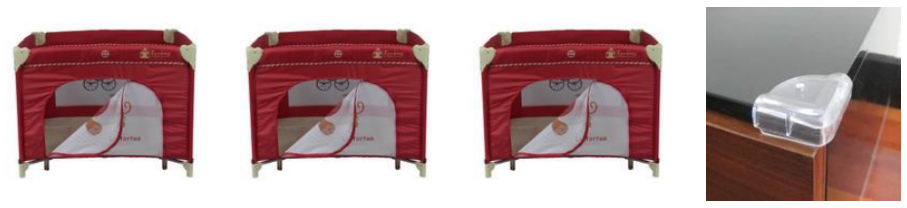

In [18]:
search_similar_image('946858_0.jpg', 4)

192228


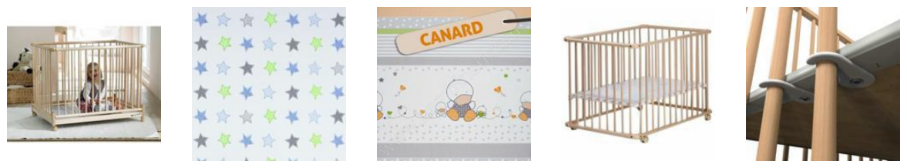

In [19]:
search_similar_image('192228_0.jpg', 5)

529559


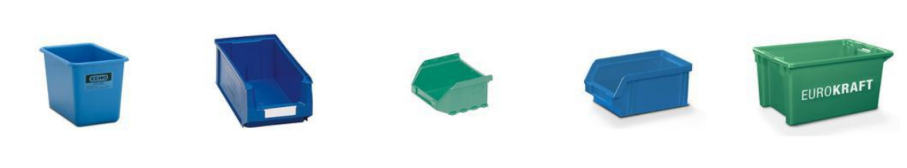

In [24]:
search_similar_image('529559_0.jpg', 5)

In [22]:
import json

In [23]:
 # Writes the 'named_nearest_neighbors' to a json file
with open('nearest_neighbors.json', 'w') as out:
    json.dump(named_nearest_neighbors, out)